In [23]:
from astropy.io import fits
import astropy.constants as c
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import os
from scipy.signal import find_peaks

In [101]:
import importlib
import util
importlib.reload(util) # run this each time util is changed, to prevent restarting kernel

<module 'util' from '/Users/dennisraush/Desktop/caltech/senior/spring/Ay-Ge 107/ay107_observation/util.py'>

### Imports and environment tuning

In [25]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
%matplotlib inline

In [26]:
dirname = '20240504'
fpaths = glob.glob(f'{dirname}/*.fits')
hdr_keys = ['OBJECT', 'IMGTYPE', 'GAIN', 'EXPTIME', 'UT', 'RA', 'DEC', 'AIRMASS', 'GRATING']
hdr_data = []
data = {}
for fpath in fpaths:
    with fits.open(fpath) as hdul:
        k = re.split(r'/|\.', fpath)[1]
        hdr = hdul[0].header
        hdr_data.append([hdr.get(k, None) for k in hdr_keys])
        data[k] = hdul[0].data.astype(float)
hdr_df = (pd.DataFrame(hdr_data, columns=hdr_keys, index=[re.split(r'/|\.', fpath)[1] for fpath in fpaths]))
hdr_df.index.name = 'filename'
hdr_df.sort_index()
hdr_df

,OBJECT,IMGTYPE,GAIN,EXPTIME,UT,RA,DEC,AIRMASS,GRATING
filename,,,,,,,,,
red0018,none,flat,2.80,50.0,23:40:04.3,06:40:29.32,+33:32:50.1,1.000,316/7500
blue0016,fe-ar,cal,0.72,30.0,23:31:40.1,06:32:03.67,+33:32:32.7,1.000,600/4000
red0022,none,object,2.80,600.0,03:49:20.9,16:59:05.87,+42:52:25.9,2.817,316/7500
red0002,,bias,2.80,0.0,23:17:19.5,06:17:40.67,+33:32:02.7,1.000,316/7500
red0014,he ne ar,cal,2.80,0.5,23:24:46.9,06:25:09.31,+33:32:18.3,1.000,316/7500
blue0020,none,flat,0.72,80.0,23:42:43.2,06:43:08.68,+33:32:55.6,1.000,600/4000
blue0021,none,flat,0.72,80.0,23:44:24.9,06:44:50.67,+33:32:59.1,1.000,600/4000
red0015,he ne ar,cal,2.80,0.5,23:25:10.6,06:25:33.09,+33:32:19.1,1.000,316/7500
red0003,,bias,2.80,0.0,23:17:42.7,06:18:03.94,+33:32:03.6,1.000,316/7500


In [27]:
red_shape = data['red0001'].shape
blue_shape = data['blue0001'].shape

bias = hdr_df[hdr_df['IMGTYPE'] == 'bias']
flats = hdr_df[hdr_df['IMGTYPE'] == 'flat']
arcs = hdr_df[hdr_df['IMGTYPE'] == 'cal']
calib_star = hdr_df[(hdr_df['IMGTYPE'] == 'object') & (hdr_df['OBJECT'] == 'HD 158261')]
#remove saturated frames for blue calib star
calib_star.drop(calib_star.loc[(calib_star.index.str.contains('blue')) & (calib_star['EXPTIME'] > 0.5)].index,
                inplace=True)

### Master bias (red)
def create_master(frame, color, bias=None):
    frame_filtered = frame[np.char.startswith(list(frame.index), color)]
    shape = red_shape if color == 'red' else blue_shape
    layers = np.zeros((shape[0], shape[1], frame_filtered.shape[0]))
    for i, curr_file in enumerate(frame_filtered.index):
        curr_data = data[curr_file]
        if bias is not None:
            texp = frame_filtered.loc[curr_file, 'EXPTIME']
            curr_data = (curr_data - bias) / texp
        layers[:, :, i] = curr_data

    master = np.median(layers, axis=2)
    return master

master_bias_red = create_master(bias, 'red')
### Master bias (blue)
master_bias_blue = create_master(bias, 'blue')
### Master flat (red)
master_flat_red = create_master(flats, 'red', master_bias_red)
### Master flat (blue)
master_flat_blue = create_master(flats, 'blue', master_bias_blue)
### Master arc (red)
master_arc_red = create_master(arcs, 'red', master_bias_red)
### Master arc (blue)
master_arc_blue = create_master(arcs, 'blue', master_bias_blue)
## Rectify frames
### Rectify blue
#### Find trace using calib star
master_calib_star_blue = create_master(calib_star, 'blue', master_bias_blue).T
x_edges_B = [100, 1200, 2400]  #0 is dead
y_edges_B = [np.argmax(master_calib_star_blue[:, i]) for i in x_edges_B]

prange_B = (5, 95)
trace_x_B = np.arange(0, master_calib_star_blue.shape[1], 1)  # x indices remain same
# fit a polynomial using x,y edges_B and evaluate entire trace
trace_y_B = np.round(np.polyval(np.polyfit(x_edges_B, y_edges_B, 1), trace_x_B)).astype(
    int)  #y indices has to be integers

#### Find y pixelbounds using flat

y_bound_upper_B, y_bound_lower_B = (91, 200)
# 1. Transpose array [where needed]
# 2. Pick values column wise within the y bounds
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B = [
    util.rectify_frame(frame, trace_y_B, y_bound_upper_B, y_bound_lower_B) for frame in
    [master_flat_blue.T, master_calib_star_blue, master_bias_blue.T, master_arc_blue.T]]
#### Find X-trim bounds
flat1D_B = np.median(rectified_flat_B, axis=0)
x_trim_mask_B = np.where((flat1D_B >= np.max(flat1D_B) * 0.03))[0]  # selecting 0.03 based on 1D flat

# 3. pick values within x-bounds
# 4. flip along X-axis (because blue has inverted wavelength axis)
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B = [
    frame[:, x_trim_mask_B][:, ::-1] for frame in
    [rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B]]
#### Rectified blue frames plots
trace_y_idx_B = y_bound_lower_B


### Rectify Red
#### Find trace
master_calib_star_red = create_master(calib_star, 'red', master_bias_red)
x_edges_R = [400, 3600, 4100]
y_edges_R = [np.argmax(master_calib_star_red[:, i]) for i in x_edges_R]

prange_R = (7, 93)

trace_x_R = np.arange(0, master_calib_star_red.shape[1], 1)  # x indices remain same
trace_y_R = np.round(np.polyval(np.polyfit(x_edges_R, y_edges_R, 1), trace_x_R)).astype(
    int)  #y indices has to be integers
#### Find y pixel bounds

y_bound_upper_R, y_bound_lower_R = (282, 120)
# 1. Pick values column wise within the y bounds
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R = [
    util.rectify_frame(frame, trace_y_R, y_bound_upper_R, y_bound_lower_R) for frame in
    [master_flat_red, master_calib_star_red, master_bias_red, master_arc_red]]
#### Find X-trim bounds
flat1D_R = np.median(rectified_flat_R, axis=0)

x_trim_mask_R = np.where((flat1D_R >= np.max(flat1D_R) * 0.03))[0]
x_trim_mask_R = x_trim_mask_R[x_trim_mask_R >= 732]
# 2. pick values within x-bounds
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R = [
    frame[:, x_trim_mask_R] for frame in
    [rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R]]
#### Rectifed Red frames plots
trace_y_idx_R = y_bound_lower_R
### Red
normalised_flat_R = rectified_flat_R / np.max(rectified_flat_R)
reduced_rect_calib_R = rectified_calib_R / normalised_flat_R

### Blue
normalised_flat_B = rectified_flat_B / np.max(rectified_flat_B)
reduced_rect_calib_B = rectified_calib_B / normalised_flat_B

/var/folders/yx/0g48k4cd68s3hl5thym8v0br0000gn/T/ipykernel_55300/3947316879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calib_star.drop(calib_star.loc[(calib_star.index.str.contains('blue')) & (calib_star['EXPTIME'] > 0.5)].index,


### Figure 1 (selection of raw data)

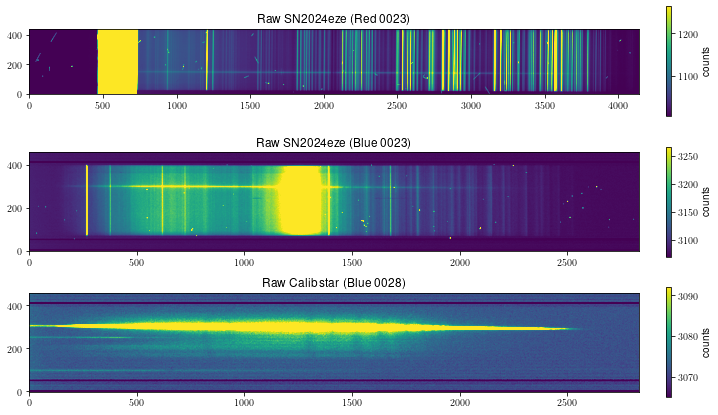

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
fig.tight_layout()
util.plot_frame2(data['red0023'], label='counts', title='Raw SN2024eze (Red 0023)', prange=(10, 90), ax=ax[0])
util.plot_frame2(data['blue0023'].T, label='counts', title='Raw SN2024eze (Blue 0023)', prange=(5,95), ax=ax[1])
util.plot_frame2(data['blue0028'].T, label='counts', title='Raw Calib star (Blue 0028)', prange=(5,95), ax=ax[2])

fig.savefig('figures/fig1.png')

### Figure 2 (flats, calib, arc, and bias)

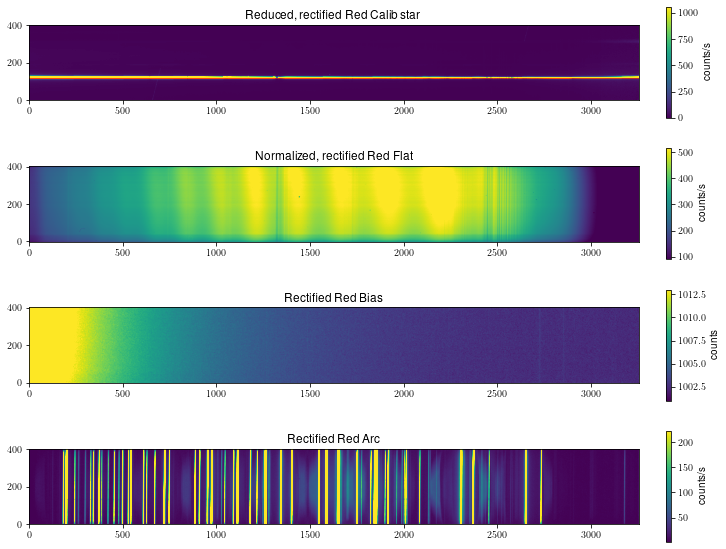

In [29]:
fig, ax = plt.subplots(4,1, figsize=(10, 8))
fig.tight_layout()
util.plot_frame2(reduced_rect_calib_R, label='counts/s', title='Reduced, rectified Red Calib star', prange=(2, 98), ax=ax[0])
ax[0].axhline(trace_y_idx_R, color='r', alpha=0.7, linewidth=1)
util.plot_frame2(rectified_flat_R, label='counts/s', title='Normalized, rectified Red Flat', prange=prange_R, ax=ax[1])
util.plot_frame2(rectified_bias_R, label='counts', title='Rectified Red Bias', prange=prange_R, ax=ax[2])
util.plot_frame2(rectified_arc_R, label='counts/s', title='Rectified Red Arc', prange=prange_R, ax=ax[3])

fig.savefig('figures/fig2a.png',  dpi=250)

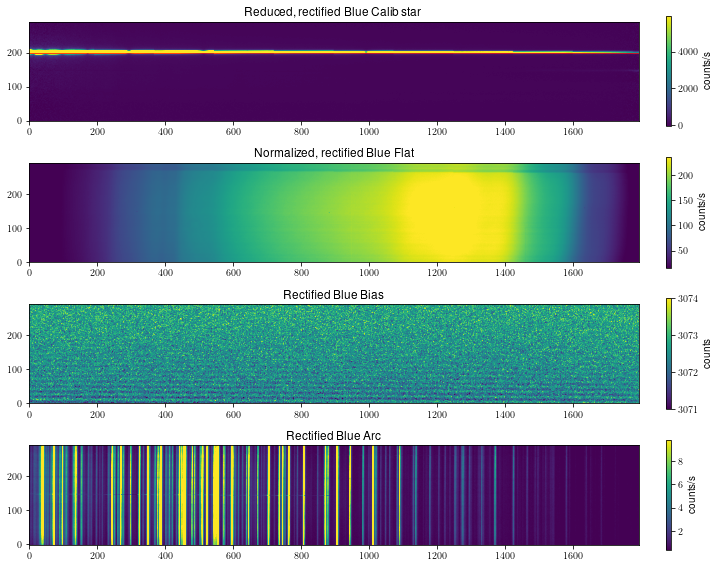

In [30]:
fig, ax = plt.subplots(4,1, figsize=(10, 8))
fig.tight_layout()
util.plot_frame2(reduced_rect_calib_B, label='counts/s', title='Reduced, rectified Blue Calib star', prange=(2, 98), ax=ax[0])
ax[0].axhline(trace_y_idx_B, color='r', alpha=0.7, linewidth=1)
util.plot_frame2(rectified_flat_B, label='counts/s', title='Normalized, rectified Blue Flat', prange=prange_R, ax=ax[1])
util.plot_frame2(rectified_bias_B, label='counts', title='Rectified Blue Bias', prange=prange_R, ax=ax[2])
util.plot_frame2(rectified_arc_B, label='counts/s', title='Rectified Blue Arc', prange=prange_R, ax=ax[3])

fig.savefig('figures/fig2b.png', dpi=250)

### Figure 3 (Wavelength calibration)

In [31]:
arc_aperture_B = (rectified_calib_B.shape[0] - 1 - trace_y_idx_B)
# take median and flip along x-axis
arc_1D_spectrum_B = np.median(rectified_arc_B[trace_y_idx_B - arc_aperture_B: trace_y_idx_B + arc_aperture_B + 1],
                              axis=0)

peaks_x_B, _ = find_peaks(arc_1D_spectrum_B, height=8, distance=12)
# Identified peaks from figure 10c, 10b (page 29-30 in https://sites.astro.caltech.edu/palomar/observer/200inchResources/dbsp/dbspArcAtlas.pdf)
# using: {key - 910: value for key, value in peaks_wvl_B.items() if key - 910 >= 0}
peaks_wvl_B = {
    906: (4764.865, 'Ar'),
    944: (4806.021, 'Ar'),
    983: (4847.81, 'Ar'),
    1012: (4879.864, 'Ar'),
    872: (4726.868, 'Ar'),
    808: (4657.901, 'Ar'),
    764: (4609.567, 'Ar'),
    705: (4545.052, 'Ar'),
    647: (4481.811, 'Ar'),
    596: (4426.001, 'Ar'),
    524: (4348.064, 'Ar'),
    459: (4277.528, 'Ar'),
    442: (4259.362, 'Ar'),
    388: (4198.317, 'Ar'),
    349: (4158.591, 'Ar'),
    324: (4131.724, 'Ar'),
    299: (4103.912, 'Ar'),
    245: (4045.813, 'Fe'),
    97: (3886.282, 'Fe'),
    73: (3859.911, 'Fe')
}
# plt.legend();
peaks_pixels_B = np.array(list(peaks_wvl_B.keys()))
peaks_wavelengths_B = np.array([wvl for wvl, _ in peaks_wvl_B.values()])


def wvl_solution_B(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_B, peaks_wavelengths_B, deg)
    return np.polyval(coefficients, pixels)

### Red
arc_aperture_R = trace_y_idx_R
arc_1D_spectrum_R = np.median(rectified_arc_R[trace_y_idx_R - arc_aperture_R: trace_y_idx_R + arc_aperture_R + 1],
                              axis=0)

peaks_x_R, _ = find_peaks(arc_1D_spectrum_R, height=1000, distance=12)
    
# Identified peaks from figure 16b, 18a (https://sites.astro.caltech.edu/palomar/observer/200inchResources/dbsp/dbspArcAtlas.pdf)
peaks_wvl_R = {
    2652: (9657.786, 'Ar'),
    2372: (9224.499, 'Ar'),
    2307: (9122.967, 'Ar'),
    1918: (8521.442, 'Ar'),
    1856: (8424.648, 'Ar'),
    1752: (8264.522, 'Ar'),
    1655: (8115.311, 'Ar'),
    1590: (8014.786, 'Ar'),
    1547: (7948.176, 'Ar'),
    1402: (7723.761, 'Ar'),
    1344: (7635.106, 'Ar'),
    1259: (7503.869, 'Ar'),
    498: (6334.428, 'Ne'),
    530: (6382.992, 'Ne'),
    543: (6402.246, 'Ne'),
    611: (6506.628, 'Ne'),
    723: (6678.276, 'Ne'),
    748: (6717.043, 'Ne')
}

# plt.legend();
peaks_pixels_R = np.array(list(peaks_wvl_R.keys()))
peaks_wavelengths_R = np.array([wvl for wvl, _ in peaks_wvl_R.values()])


def wvl_solution_R(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_R, peaks_wavelengths_R, deg)
    return np.polyval(coefficients, pixels)

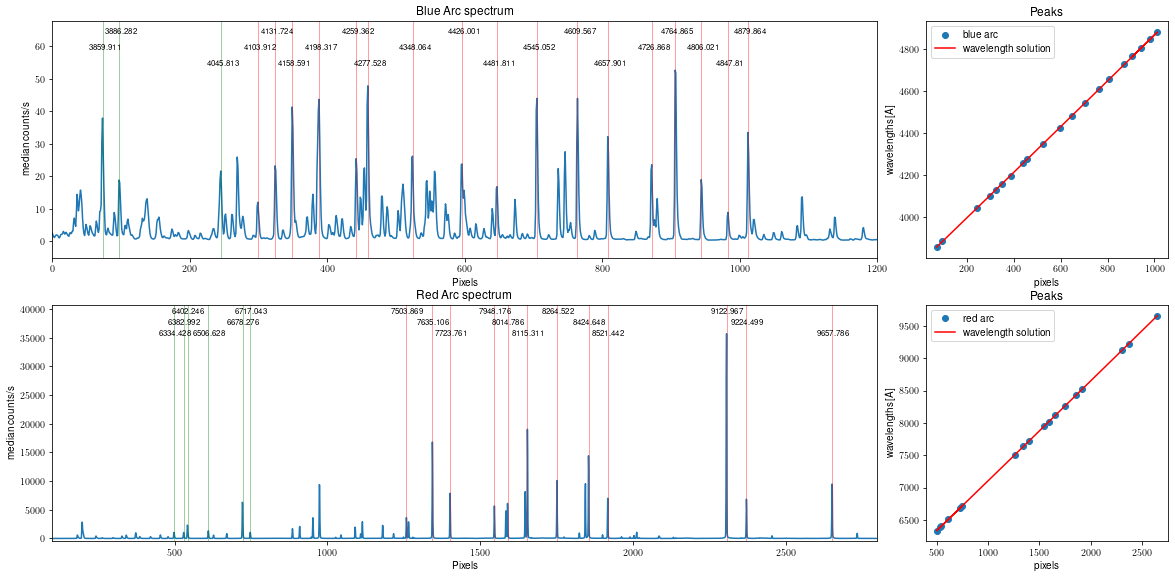

In [65]:
# blue peak matching
fig = plt.figure(figsize=(20,20))
fig.tight_layout()
gs = fig.add_gridspec(4,4)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3])
ax3 = fig.add_subplot(gs[1, :3])
ax4 = fig.add_subplot(gs[1, 3])

ax1.plot(arc_1D_spectrum_B)
ax1.set_ylabel('median counts/s')
ax1.set_xlabel("Pixels")
ax1.set_title('Blue Arc spectrum')
ax1.set_xlim(0, 1200)
ax1.set_ylim(-5, np.max(arc_1D_spectrum_B)+15) # to allow space for annotations


for i, (px, wvl) in enumerate(peaks_wvl_B.items()):
    line_clr = 'green' if wvl[1]=='Fe' else 'red'
    ax1.axvline(px, color=line_clr, alpha=0.75, linewidth=0.5, label=wvl[1])
    ax1.text(px+4, np.max(arc_1D_spectrum_B)+12-(5*(i%3)), f'{wvl[0]}', fontsize=8, ha='center', va='center')

peaks_pixels_B = np.array(list(peaks_wvl_B.keys()))
peaks_wavelengths_B = np.array([wvl for wvl, _ in peaks_wvl_B.values()])

def wvl_solution_B(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_B, peaks_wavelengths_B, deg)
    return np.polyval(coefficients, pixels)

ax2.scatter(peaks_pixels_B, peaks_wavelengths_B, label='blue arc')
ax2.plot(peaks_pixels_B, wvl_solution_B(peaks_pixels_B), color='r', label='wavelength solution')
ax2.set_xlabel('pixels')
ax2.set_ylabel('wavelengths [\AA]')
ax2.set_title('Peaks')
ax2.legend()

ax3.plot(arc_1D_spectrum_R)
ax3.set_xlabel("Pixels")
ax3.set_ylabel('median counts/s')
ax3.set_title('Red Arc spectrum')
ax3.set_xlim(100, 2800)
ax3.set_ylim(-500, np.max(arc_1D_spectrum_R) + 5000)  # to allow space for annotations

for i, (px, wvl) in enumerate(peaks_wvl_R.items()):
    line_clr = 'green' if wvl[1] == 'Ne' else 'red'
    ax3.axvline(px, color=line_clr, alpha=0.75, linewidth=0.5, label=wvl[1])
    ax3.text(px + 4, np.max(arc_1D_spectrum_R) + (1900 * (i % 3)), f'{wvl[0]}', fontsize=8, ha='center', va='center')


peaks_pixels_R = np.array(list(peaks_wvl_R.keys()))
peaks_wavelengths_R = np.array([wvl for wvl, _ in peaks_wvl_R.values()])


def wvl_solution_R(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_R, peaks_wavelengths_R, deg)
    return np.polyval(coefficients, pixels)


ax4.scatter(peaks_pixels_R, peaks_wavelengths_R, label='red arc')
ax4.plot(peaks_pixels_R, wvl_solution_R(peaks_pixels_R), color='r', label='wavelength solution')
ax4.set_xlabel('pixels')
ax4.set_ylabel('wavelengths [\AA]')
ax4.set_title('Peaks')
ax4.legend()

fig.savefig("figures/fig3.png", dpi=200)

### Figure 4 (flux calibration)

In [66]:
wvl_range_R = wvl_solution_R(np.arange(0, rectified_arc_R.shape[1]))
wvl_range_B = wvl_solution_B(np.arange(0, rectified_arc_B.shape[1]))
just_before_R_idx = np.searchsorted(wvl_range_B, wvl_range_R[0])-1 

# right-truncated B wavlengths
end_idx_B = just_before_R_idx + 1 # because np slicing excludes end index
wvl_range_B_trunc = wvl_range_B[: end_idx_B]

Text(0.5, 1.0, 'Rectified reduced calib star (RED)')

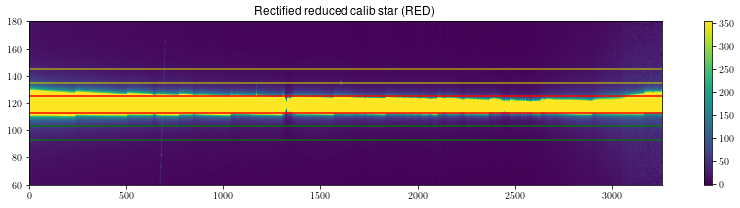

In [67]:
aperture_idx_R = (trace_y_idx_R-1 - 6, trace_y_idx_R-1 + 6)
bg_upper_idx_R = (aperture_idx_R[1]+10, aperture_idx_R[1]+20)
bg_lower_idx_R = (aperture_idx_R[0]-20, aperture_idx_R[0]-10)

util.plot_frame(reduced_rect_calib_R, prange=(3,97), aspect=7)
plt.ylim(trace_y_idx_R - 10 * 6,trace_y_idx_R + 10 * 6 )
plt.axhline(y=aperture_idx_R[0], color='r')
plt.axhline(y=aperture_idx_R[1], color='r')

plt.axhline(bg_lower_idx_R[0], color='g', alpha=0.8)
plt.axhline(bg_lower_idx_R[1], color='g', alpha=0.8)
plt.axhline(bg_upper_idx_R[0], color='y', alpha=0.8)
plt.axhline(bg_upper_idx_R[1], color='y', alpha=0.8)

plt.title("Rectified reduced calib star (RED)")

Text(0.5, 1.0, 'reduced rectified background-subtracted calib star spectrum (RED)')

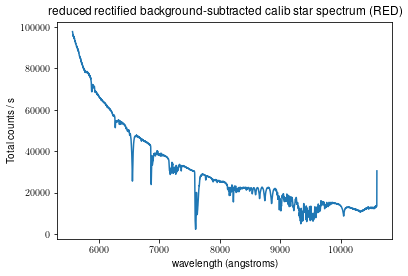

In [68]:
upper_bg_R = reduced_rect_calib_R[bg_upper_idx_R[0]: bg_upper_idx_R[1] + 1]
lower_bg_R = reduced_rect_calib_R[bg_lower_idx_R[0]: bg_lower_idx_R[1] + 1]
calib_spectrum_R = np.sum(
    reduced_rect_calib_R[aperture_idx_R[0]: aperture_idx_R[1]+1, :],
    axis=0)

bg_R = np.vstack([upper_bg_R, lower_bg_R])

bg_signal_R = np.median(bg_R, axis=0)

aperture_nrows_R = aperture_idx_R[1] - aperture_idx_R[0] + 1  #both are inclusive
summed_bg_R = bg_signal_R * aperture_nrows_R
calib_bg_subtracted_R = calib_spectrum_R - summed_bg_R
plt.plot(wvl_range_R, calib_bg_subtracted_R)

plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (RED)")

Text(0.5, 1.0, 'Rectified reduced calib star (BLUE)')

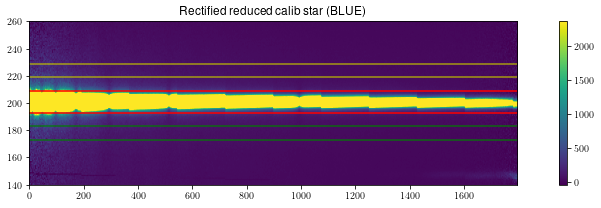

In [69]:
aperture_idx_B = (trace_y_idx_B + 1 - 8, trace_y_idx_B + 1 + 8)

calib_spectrum_B = np.sum(
    reduced_rect_calib_B[aperture_idx_B[0]: aperture_idx_B[1] + 1, :end_idx_B],
    axis=0)

bg_upper_idx_B = (aperture_idx_B[1] + 10, aperture_idx_B[1] + 20)
bg_lower_idx_B = (aperture_idx_B[0] - 20, aperture_idx_B[0] - 10)

util.plot_frame(reduced_rect_calib_B, prange=(3,97), aspect=5)
plt.ylim(trace_y_idx_B - 60, trace_y_idx_B + 60)
plt.axhline(y=aperture_idx_B[0], color='r')
plt.axhline(y=aperture_idx_B[1], color='r')

plt.axhline(bg_lower_idx_B[0], color='g', alpha=0.8)
plt.axhline(bg_lower_idx_B[1], color='g', alpha=0.8)
plt.axhline(bg_upper_idx_B[0], color='y', alpha=0.8)
plt.axhline(bg_upper_idx_B[1], color='y', alpha=0.8)
plt.title("Rectified reduced calib star (BLUE)")



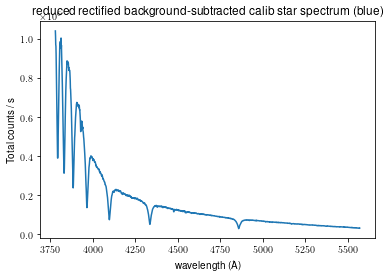

In [70]:
lower_bg_B = reduced_rect_calib_B[bg_lower_idx_B[0] : bg_lower_idx_B[1]+1]
upper_bg_B = reduced_rect_calib_B[bg_upper_idx_B[0] : bg_upper_idx_B[1]+1]

bg_B = np.vstack([upper_bg_B, lower_bg_B])
bg_signal_B = np.median(bg_B[:, :end_idx_B], axis=0)

aperture_nrows_B = aperture_idx_B[1]-aperture_idx_B[0]+1 #both are inclusive
summed_bg_B = bg_signal_B * aperture_nrows_B
calib_bg_subtracted_B = calib_spectrum_B - summed_bg_B
plt.plot(wvl_range_B_trunc, calib_bg_subtracted_B)
plt.xlabel("wavelength (\AA)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (blue)");

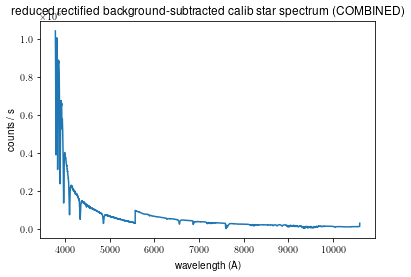

In [71]:
wvl_solution = np.hstack([wvl_range_B_trunc, wvl_range_R])
calib_final = np.hstack([calib_bg_subtracted_B, calib_bg_subtracted_R])
plt.plot(wvl_solution, calib_final)
plt.xlabel("wavelength (\AA)")
plt.ylabel("counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (COMBINED)");

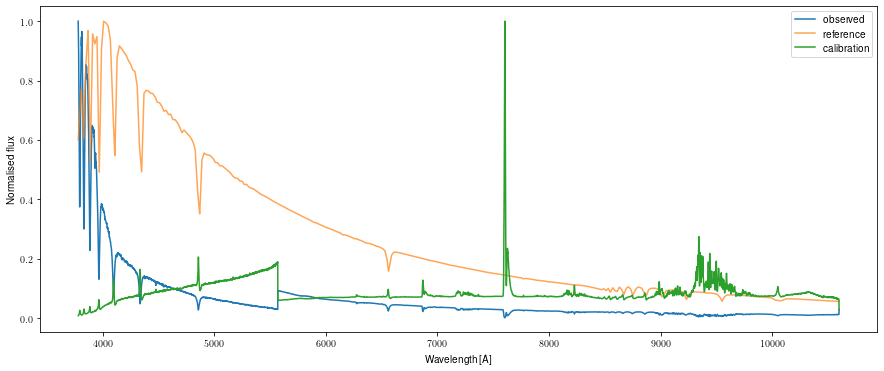

In [74]:
pysyn_env_location = os.path.join(os.getcwd(), 'grp/redcat/trds/')
os.environ['PYSYN_CDBS'] = pysyn_env_location  #note: CDBS not CBDS which is why it was throwing errors

import pysynphot as S

ref_spec = S.Icat('k93models', 9900, 0, 4.0)
ref_spec_resampled = ref_spec.resample(wvl_solution) #TODO: try scipy.signal.resample() over this
ref_spec_resampled_abs = (ref_spec_resampled.renorm
                          (5.94, 'vegamag', S.ObsBandpass('johnson,v')))
plt.figure(figsize=(15, 6))
plt.plot(wvl_solution, calib_final/np.max(calib_final), label='observed')
plt.plot(ref_spec_resampled_abs.wave, ref_spec_resampled_abs.flux/np.max(ref_spec_resampled_abs.flux), label='reference', alpha=0.7)
plt.xlabel('Wavelength [\AA]')
plt.ylabel('Normalised flux')

calibration_flux = (ref_spec_resampled_abs.flux * u.Unit('erg s-1 cm-2 AA-1')) / (calib_final * u.Unit('count/s'))
plt.plot(wvl_solution, calibration_flux / np.max(calibration_flux), label='calibration') #sanity check
plt.legend()
# plt.xlim(3700, 5000)
plt.savefig("figures/fig4.png", dpi=200)

### Figure 5 (SN 2024eze reduction)

In [79]:
science = hdr_df[(hdr_df['IMGTYPE'] == 'object') & (hdr_df['OBJECT'] != 'HD 158261')]

# TODO: if applying airmass correction, then replace create_master with following function 
# that does median stacking after applying rectification, reduction, correction to each individual frame
def master_science_frame(color):
    # TODO: split red and blue

    science_wvl, extinction_wvl, extinction = None  #TODO: add np arrays when available
    science_frames = []
    for fname in science.index:
        frame = util.rectify_frame(data[fname], trace_y_R, y_bound_upper_R, y_bound_lower_R)
        frame = util.reduce_frame(frame, science.loc[fname, 'EXPTIME'], normalised_flat_R, master_bias_red)
        frame = util.correct_airmass(science_wvl, frame, extinction_wvl, extinction, science.loc[fname, 'AIRMASS'])
        science_frames.append(frame)

    return np.median(np.array(science_frames), axis=0)


science_master_red = create_master(science, 'red', master_bias_red)
science_master_blue = create_master(science, 'blue', master_bias_blue)
# apply step #1-2 from "Rectify red" section
science_red_rectified = util.rectify_frame(
    science_master_red, trace_y_R, y_bound_upper_R, y_bound_lower_R
)[:, x_trim_mask_R]

# apply step #1-4 from "Rectify blue" section
science_blue_rectified = util.rectify_frame(
    science_master_blue.T, trace_y_B, y_bound_upper_B, y_bound_lower_B
)[:, x_trim_mask_B][:, ::-1]

reduced_rect_science_R = science_red_rectified / normalised_flat_R
reduced_rect_science_B = science_blue_rectified / normalised_flat_B

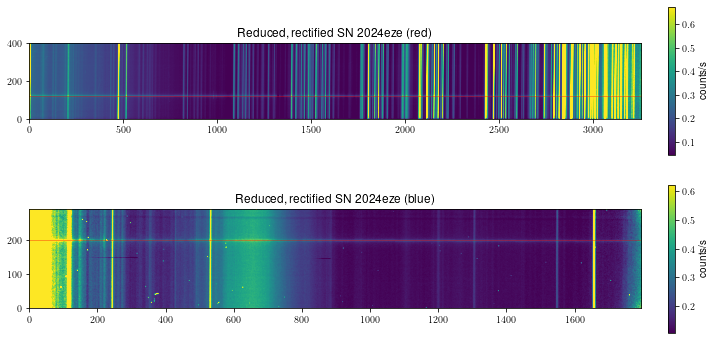

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
util.plot_frame2(reduced_rect_science_R, label='counts/s', title='Reduced, rectified SN 2024eze (red)', prange=prange_R,ax=ax[0])
ax[0].axhline(trace_y_idx_R, color='r', linewidth=0.5, alpha=0.7)


util.plot_frame2(reduced_rect_science_B, label='counts/s', title='Reduced, rectified SN 2024eze (blue)',
                 prange=prange_B,ax=ax[1])
ax[1].axhline(trace_y_idx_B, color='r', linewidth=0.5, alpha=0.7)

fig.savefig("figures/fig5.png", dpi=200)

(50.0, 200.0)

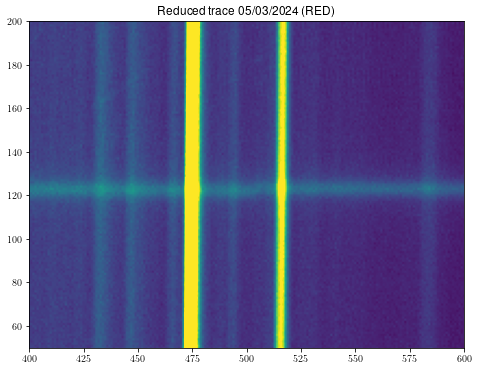

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
util.plot_frame2(reduced_rect_science_R, label='counts/s', title='Reduced trace 05/03/2024 (RED)', prange=prange_R, colorbar=False, ax=ax)
ax.set_xlim(400, 600)
ax.set_ylim(50, 200)
#ax.axhline(trace_y_idx_R, color='r', linewidth=0.5, alpha=0.7)

### Figure 6 (Comparison and line identification)